### The Airbnb data

This Dataset contains Airbnb data collected online. It contains infomation about when and through which channel users signed up and patronized their service.

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the file
airbnbdata=pd.read_csv('airbnb_data.csv')

airbnbdata.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [3]:
#taking a peep
airbnbdata.head(20)



,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


#### Things to tidy up
Looking at the data we have,here are the areas we will be cleaning up
<p> 1.'date_account_created' and 'timestamp_first_active' data types will be converted to datetime
<p> 2.'date_first_booking' has a relatively low entries(a lot of missing values), may be dropped out.
<p> 3.'gender' has an inconsistent casing.
<p> 4.'age' has missing values. It will be considered for filling either with the mean or the median
<p> 5.'age' data type will be converted from float to integer
<p> 6.The 'age' column has some outliers
<p> 7.There are inconsistent casing in the 'first_device_type' and 'first_browser' column

In [4]:
# date_account_created converted from object to datetime
airbnbdata['date_account_created']= pd.to_datetime(airbnbdata['date_account_created'])

In [5]:
airbnbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  int64         
 3   date_first_booking       88908 non-null   object        
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

In [6]:
# timestamp_first_active converted from integer to datetime
airbnbdata['timestamp_first_active']= pd.to_datetime(airbnbdata['timestamp_first_active'],format='%Y%m%d%H%M%S')

airbnbdata.tail()


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF
213450,nw9fwlyb5f,2014-06-30,2014-06-30 23:58:24,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


In [7]:
#dropping the 'date_first_booking' column. It has a very high rate of missing values compared to the count of rows in this dataset
airbnbnew=airbnbdata.drop('date_first_booking', axis=1)



In [8]:
#changing the casing of the entries in this column to lowercase
airbnbnew['gender']=airbnbnew['gender'].str.lower()

In [9]:
#stripping off the hyphen symbol in the word '-unknown-'
airbnbnew['gender']=airbnbnew['gender'].str.strip('-')
airbnbnew


,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,unknown,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,male,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,female,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,female,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,unknown,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,male,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,unknown,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,unknown,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,unknown,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [10]:
#checking the statistical values of the 'age' column
airbnbnew.describe()




,age,signup_flow
count,125461.000000,213451.000000
mean,49.668335,3.267387
std,155.666612,7.637707
min,1.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,43.000000,0.000000
max,2014.000000,25.000000


<Figure size 432x288 with 0 Axes>

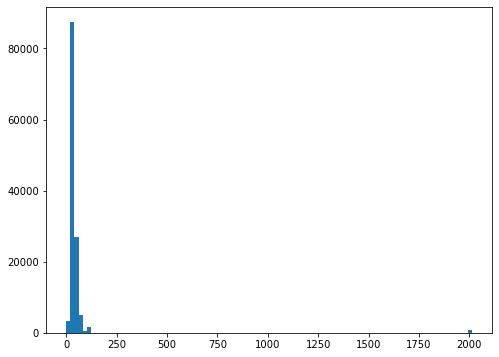

In [11]:
fig = plt.figure()
plt.figure(figsize=(8,6))
plt.hist(airbnbdata['age'],bins=100)
plt.show()

In [12]:
#detected an unexpected and incorrect age in the 'age column'
#it looks like after the age 115, every other entry were years, so now we will calculate and convert them to ages
#outage= airbnbnew[airbnbdata['age'] == 116]
#outage= airbnbnew[airbnbdata['age'] == 120]
maxage= airbnbnew[airbnbdata['age'] == 115]

maxage.head(30)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2228,i0j7vqzk2m,2010-10-29,2010-10-29 18:24:48,male,115.0,facebook,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF
9645,gj79z2s4g4,2011-09-17,2011-09-17 13:14:29,male,115.0,facebook,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
11530,ai8c9x7w2l,2011-10-22,2011-10-22 19:37:17,male,115.0,facebook,0,en,direct,direct,omg,Web,Windows Desktop,Chrome,NDF
15815,7cqnukdc9n,2012-01-25,2012-01-25 04:06:51,unknown,115.0,basic,0,en,sem-non-brand,google,linked,Web,Mac Desktop,Chrome,US
36237,8u3tl9jtdl,2012-08-13,2012-08-13 04:24:39,male,115.0,facebook,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NDF
39083,fkczuwikaq,2012-09-01,2012-09-01 16:48:22,female,115.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
50539,e8vpql9dyv,2012-11-30,2012-11-30 19:31:54,female,115.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
52115,vecht936du,2012-12-12,2012-12-12 22:00:14,male,115.0,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,NDF
52963,32sirobk34,2012-12-20,2012-12-20 17:52:22,female,115.0,facebook,0,en,direct,direct,omg,Web,Windows Desktop,Firefox,NDF
54803,bo391whvc8,2013-01-06,2013-01-06 21:54:50,male,115.0,facebook,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF


In [13]:
#let's drop those ages greater than 115 for now, when we work on them, we will add them back to form one dataframe
newairbnb= airbnbnew.loc[airbnbnew['age'] <=115]


In [14]:
oddage=airbnbnew.loc[airbnbnew['age'] >115]
#oddage['age']= 2014-oddage[['age']]
#oddage.head()
oddage.info()
#after converting them, it is clear and justifiable to declare them as wrong entries, 
#therefore we'll be dropping it entirely and our new working dataframe will be 'newairbnb'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 388 to 211496
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       781 non-null    object        
 1   date_account_created     781 non-null    datetime64[ns]
 2   timestamp_first_active   781 non-null    datetime64[ns]
 3   gender                   781 non-null    object        
 4   age                      781 non-null    float64       
 5   signup_method            781 non-null    object        
 6   signup_flow              781 non-null    int64         
 7   language                 781 non-null    object        
 8   affiliate_channel        781 non-null    object        
 9   affiliate_provider       781 non-null    object        
 10  first_affiliate_tracked  747 non-null    object        
 11  signup_app               781 non-null    object        
 12  first_device_type        781 no

<Figure size 432x288 with 0 Axes>

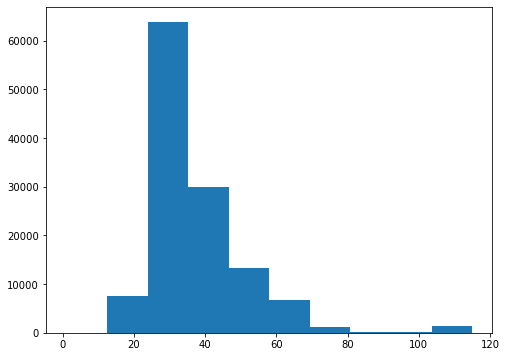

In [15]:
fig = plt.figure()
plt.figure(figsize=(8,6))
plt.hist(newairbnb['age'],bins=10)
plt.show()

In [16]:
print(newairbnb['age'].max())

115.0


In [17]:
newairbnb.describe()

,age,signup_flow
count,124680.000000,124680.000000
mean,37.411870,2.517717
std,13.952402,6.568004
min,1.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,43.000000,0.000000
max,115.000000,25.000000


In [18]:
#replacing the missing values with the median of the entire age population after much consideration
newairbnb['age']=newairbnb['age'].fillna(newairbnb['age'].mean())


In [19]:
newairbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124680 entries, 1 to 213448
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       124680 non-null  object        
 1   date_account_created     124680 non-null  datetime64[ns]
 2   timestamp_first_active   124680 non-null  datetime64[ns]
 3   gender                   124680 non-null  object        
 4   age                      124680 non-null  float64       
 5   signup_method            124680 non-null  object        
 6   signup_flow              124680 non-null  int64         
 7   language                 124680 non-null  object        
 8   affiliate_channel        124680 non-null  object        
 9   affiliate_provider       124680 non-null  object        
 10  first_affiliate_tracked  122682 non-null  object        
 11  signup_app               124680 non-null  object        
 12  first_device_typ

In [20]:
newairbnb['age']=newairbnb['age'].astype('int64')
newairbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124680 entries, 1 to 213448
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       124680 non-null  object        
 1   date_account_created     124680 non-null  datetime64[ns]
 2   timestamp_first_active   124680 non-null  datetime64[ns]
 3   gender                   124680 non-null  object        
 4   age                      124680 non-null  int64         
 5   signup_method            124680 non-null  object        
 6   signup_flow              124680 non-null  int64         
 7   language                 124680 non-null  object        
 8   affiliate_channel        124680 non-null  object        
 9   affiliate_provider       124680 non-null  object        
 10  first_affiliate_tracked  122682 non-null  object        
 11  signup_app               124680 non-null  object        
 12  first_device_typ

In [21]:
newairbnb.head(35)



,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,male,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,female,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,female,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,unknown,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,female,46,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,female,47,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,female,50,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,unknown,46,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US
10,yuuqmid2rp,2010-01-04,2010-01-04 19:42:51,female,36,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US
11,om1ss59ys8,2010-01-05,2010-01-05 05:18:12,female,47,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF


In [22]:
#taking out unwanted symbols
newairbnb['first_device_type'].unique()


array(['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown',
       'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone',
       'SmartPhone (Other)'], dtype=object)

In [23]:
newairbnb['first_device_type']=newairbnb['first_device_type'].str.replace('Other/','')

In [24]:
newairbnb['first_device_type'].unique()

array(['Mac Desktop', 'Windows Desktop', 'iPhone', 'Unknown',
       'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone',
       'SmartPhone (Other)'], dtype=object)

In [25]:
#taking out unwanted symbols
newairbnb['first_browser']=newairbnb['first_browser'].str.strip('-')
newairbnb['first_browser'].unique()


array(['Chrome', 'IE', 'Firefox', 'Safari', 'unknown', 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Mobile Firefox', 'Opera', 'TenFourFox',
       'Apple Mail', 'Silk', 'Camino', 'IE Mobile', 'BlackBerry Browser',
       'SeaMonkey', 'Sogou Explorer', 'IceWeasel', 'SiteKiosk',
       'Opera Mini', 'Maxthon', 'Kindle Browser', 'CoolNovo',
       'wOSBrowser', 'Iron', 'Mozilla', 'PS Vita browser', 'NetNewsWire',
       'Pale Moon', 'Avant Browser', 'Opera Mobile', 'Yandex.Browser',
       'CometBird', 'TheWorld Browser', 'SlimBrowser', 'Comodo Dragon',
       'Stainless'], dtype=object)

## All Set
#Thank yo